# Author : Surabhi Narendra Revandkar

# Data Science and Business Analytics Intern at The Sparks Foundation

# Task 2: Predict the percentage of student based on the number of study  hours

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Check for the null values

In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.shape

(25, 2)

## Visualization of Hours vs. Percentage

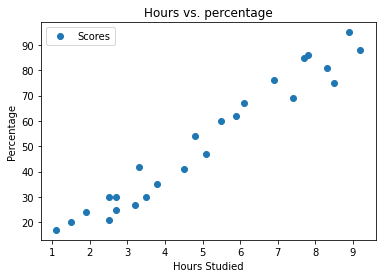

In [13]:
df.plot(x= 'Hours',y = 'Scores', style = 'o')
plt.title('Hours vs. percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

### From the above plot, we can clearly see that there exists a positive correlation between the hours studies and the percentage fetched by a student

### Split the data into train and test

In [14]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape

(20, 1)

In [18]:
y_test.shape

(5,)

## USING XGBREGRESSOR

In [49]:
from xgboost import XGBRegressor

#### Implement the model on train data

In [50]:
model = XGBRegressor(max_depth = 6)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Predict the model on test data

In [56]:
target = model.predict(X_test)
print(target)

[23.998695 41.997395 84.99984  21.00187  66.99839 ]


#### Compare actual vs. predicted

In [57]:
act_pred = pd.DataFrame({'Actual': y_test, 'Predicted':target})
act_pred

,Actual,Predicted
0,20,23.998695
1,27,41.997395
2,69,84.999840
3,30,21.001869
4,62,66.998390


#### Check for the input = 9.25 hours

In [54]:
value = np.array(9.25)
value = value.reshape(-1, 1)
pred = model.predict(value)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [88.000465].


#### Evaluate the model

In [55]:
from sklearn.metrics import mean_squared_error
print('Mean square error:',mean_squared_error(target,y_test))

Mean square error: 120.57130876744922


## NOW USING LINEAR REGRESSION

#### Implement the algorithm on train data

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training completed!")

Training completed!


#### Plot the regression line

In [38]:
line = regressor.coef_*X+regressor.intercept_

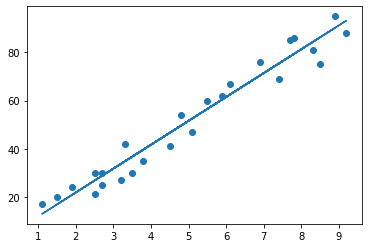

In [42]:
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

#### Predictions on test data

In [22]:
y_pred_ = regressor.predict(X_test)
print(y_pred_)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### Comapre actual vs. predicted data

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Test for hours studied = 9.25

In [37]:
value = np.array(9.25)
value = value.reshape(-1, 1)
pred_linear = regressor.predict(value)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred_linear))

If the student studies for 9.25 hours/day, the score is [93.69173249].


#### Evaluate the model

In [27]:
from sklearn.metrics import mean_squared_error
print('Mean Square Error :',mean_squared_error(y_test,y_pred_))

Mean Square Error : 21.598769307217406


### Conclusion

1. We implemented two supervised Machine Learning algorithms for predicted the score of student who studies for 9.5 hours/day
2. Models implements: 
   XGBREGRESSOR
   LINEAR REGRESSION
3. The RMSE value of XGBREGRESSOR = 120.57
4. The RMSE value of LINEAR REGRESSION = 21.59
5. The lower the RMSE value, the better is the model

Since our RMSE value for Linear Regression came out to be much smaller than the XGBRegressor, we will finalize the Linear regression model as the best fit for our prediction


Therefore, according to Linear regression model we can say that if a student studies for 9.25 hours per day then he can score 93.69 percentage marks in his exams.

